In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

def get_VOCAB(corpus):
   # Getting Tokenize the news text
    corpus = corpus.apply(tokenizer.tokenize)

    # news information
    all_words = [word for tokens in corpus for word in tokens]
    sentence_lengths = [len(tokens) for tokens in corpus]

    VOCAB = sorted(list(set(all_words)))
    print("Data with StopWord :")
    print("- words total =", len(all_words))
    print("- vocabulary size =" , len(VOCAB))
    print("- Max sentence length =", max(sentence_lengths))
    print("- Min sentence length =", min(sentence_lengths))    

    return all_words, sentence_lengths,VOCAB

# Real Data

In [60]:
from sklearn.utils import shuffle
import pandas as pd 
real_df= pd.read_csv('/content/drive/MyDrive/Arabic_FakeNews/Model/Balance/Data/sub_real_news.csv',index_col=0)
real_df.shape

(6000, 5)

In [61]:
real_df.head(3)

,title,description,source,text,desc_length
91208,سوني تعرض أول إنسان آلي يركض,أعلنت شركة سوني العملاقة لصناعة الإكترونيات أن...,aljazeera.net,أعلنت شركة سوني اليابانية العملاقة لصناعة الإل...,41
108456,اعترافات فلين تورط صهر ترمب,قالت وسائل إعلام أميركية إن جاريد كوشنر صهر ال...,aljazeera.net,قالت وسائل إعلام أميركية إن جاريد كوشنر صهر ال...,30
35471,4 عناصر في منزلك تمثل بيئة خصبة لتجمع البكتيريا,قد يصاب الكثير من الأشخاص بالدهشة حين يتردد إل...,aljazeera.net,قد يصاب الكثير من الأشخاص بالدهشة حين يتردد إل...,27


In [62]:
real_description = real_df.description.loc[real_df.desc_length>=200].count()
real_description

0

In [63]:
real_description = real_df.description.loc[real_df.desc_length>=150].count()
real_description

0

In [64]:
real_description = real_df.description.loc[real_df.desc_length>=100].count()
real_description

0

In [65]:
real_description = real_df.description.loc[real_df.desc_length>=80].count()
real_description

0

### Title

In [66]:
all_words, sentence_lengths,VOCAB = get_VOCAB(real_df["title"])

Data with StopWord :
- words total = 46360
- vocabulary size = 14532
- Max sentence length = 22
- Min sentence length = 4


In [67]:
total_lens = 0
for sent in real_df['title']:
    total_lens+=len(sent.split())

print(total_lens/len(real_df['title']))

7.7026666666666666


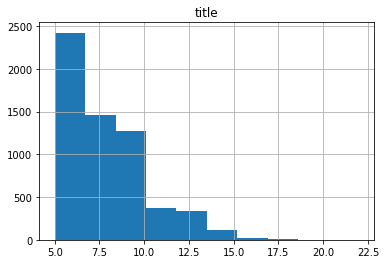

In [68]:
import matplotlib.pyplot as plt

real_count = []

for sent in real_df['title']:
    real_count.append(len(sent.split()))

length_df = pd.DataFrame({'title':real_count})

length_df.hist(bins = 10)
plt.show()

In [69]:
#Check how much % of title have 0-20 words
cnt=0
for i in real_df['title']:
    if(len(i.split())<=20):
        cnt=cnt+1


print(cnt/len(real_df['title']))

0.9998333333333334


### Description

In [70]:
all_words, sentence_lengths,VOCAB = get_VOCAB(real_df["description"])

Data with StopWord :
- words total = 168800
- vocabulary size = 31293
- Max sentence length = 79
- Min sentence length = 1


In [71]:
total_lens = 0
for sent in real_df['description']:
    total_lens+=len(sent.split())

print(total_lens/len(real_df['description']))

27.955833333333334


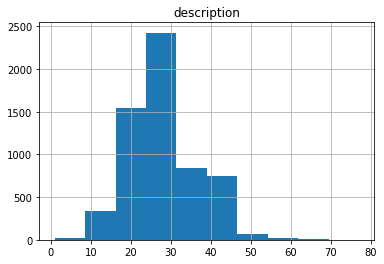

In [72]:
import matplotlib.pyplot as plt

real_count = []

for sent in real_df['description']:
    real_count.append(len(sent.split()))

length_df = pd.DataFrame({'description':real_count})

length_df.hist(bins = 10)
plt.show()

In [73]:
#Check how much % of title have 0-20 words
cnt=0
for i in real_df['description']:
    if(len(i.split())<=50):
        cnt=cnt+1


print(cnt/len(real_df['description']))

0.991


### Text

In [74]:
all_words, sentence_lengths,VOCAB = get_VOCAB(real_df["text"])

Data with StopWord :
- words total = 1871014
- vocabulary size = 124605
- Max sentence length = 5351
- Min sentence length = 21


In [75]:
total_lens = 0
for sent in real_df['text']:
    total_lens+=len(sent.split())

print(total_lens/len(real_df['text']))

310.02316666666667


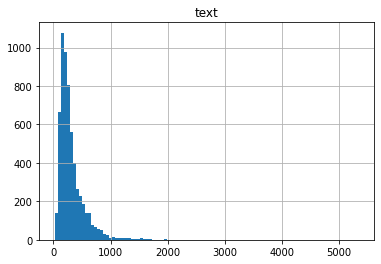

In [76]:
import matplotlib.pyplot as plt

real_count = []

for sent in real_df['text']:
    real_count.append(len(sent.split()))

length_df = pd.DataFrame({'text':real_count})

length_df.hist(bins = 100)
plt.show()

## labeled data

In [77]:
real_df['label']="real"
real_df.drop(columns=['description','text','desc_length'],axis=1,inplace=True)
real_df.rename(columns = {'title' : 'text'}, inplace = True)
real_df = shuffle(real_df) ## shuffle all the datapoints


real_df.head()

,text,source,label
289530,مستشار الأمن القومي الأمريكي يزور إسرائيل وترك...,arabic.rt.com,real
551802,اجراء قرعة دوري أبطال أوروبا اليوم,bbc.com,real
470690,"غازبروم تحصل على ترخيص بناء الخط الثاني من ""ال...",arabic.rt.com,real
505860,صحف عربية تدعو للاصطفاف بعد تفجيرات بيروت وأخر...,bbc.com,real
319213,دجوكوفيتش يتخطى تسونغا في أستراليا المفتوحة,arabic.rt.com,real


# Fake Data

In [78]:
fake_df = pd.read_excel("drive/My Drive/Arabic_FakeNews/Model/Corpora/main_fake_news.xlsx")
fake_df.drop(columns=['title','sub-title','category','has social link','claiming-type','link'],axis=1,inplace=True)
fake_df.head(4)

,claiming,fake-type,source
0,انتبهو يا جماعه وفهمو ولدكو\nعاجل وخطير . مخدر...,partially-fake,fatabyyano
1,بعد اعلان الرئيس الإيطالي تسليم الأمر إلى السم...,fake,fatabyyano
2,“هكذا حال الصين مع وباء الفايروس المنتشر مؤخرا”,fake,fatabyyano
3,حال المسلمين والمسلمات في الصين.. التعذيب على ...,fake,fatabyyano


In [79]:
fake_df['fake-type']='fake'

In [80]:
fake_df.shape

(2016, 3)

In [81]:
#rename columns
fake_df.rename(columns = {'claiming' : 'text', 'fake-type' : 'label'}, inplace = True)
fake_df.head(4)

,text,label,source
0,انتبهو يا جماعه وفهمو ولدكو\nعاجل وخطير . مخدر...,fake,fatabyyano
1,بعد اعلان الرئيس الإيطالي تسليم الأمر إلى السم...,fake,fatabyyano
2,“هكذا حال الصين مع وباء الفايروس المنتشر مؤخرا”,fake,fatabyyano
3,حال المسلمين والمسلمات في الصين.. التعذيب على ...,fake,fatabyyano


In [82]:
fake_df["text"].duplicated().sum()

3

In [83]:
fake_df.drop_duplicates(subset=['text'],inplace=True)  #dropping duplicates
fake_df.dropna(axis=0,inplace=True)   #dropping na

fake_df.shape

(2013, 3)

In [84]:
fake_df['description_length'] = fake_df.text.str.split().str.len()

In [85]:
children = fake_df.text.loc[fake_df.description_length >= 300]
children.count()

2

In [86]:
children = fake_df.text.loc[fake_df.description_length >= 250]
children.count()

4

In [87]:
children = fake_df.text.loc[fake_df.description_length >= 200]
children.count()

11

In [88]:
children = fake_df.text.loc[fake_df.description_length >= 150]
children.count()

41

In [89]:
children = fake_df.text.loc[fake_df.description_length >= 100]
children.count()

115

In [90]:
children = fake_df.text.loc[fake_df.description_length >= 80]
children.count()

175

In [91]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

def get_VOCAB(corpus):
   # Getting Tokenize the news text
    corpus = corpus.apply(tokenizer.tokenize)

    # news information
    all_words = [word for tokens in corpus for word in tokens]
    sentence_lengths = [len(tokens) for tokens in corpus]

    VOCAB = sorted(list(set(all_words)))
    print("Data with StopWord :")
    print("- words total =", len(all_words))
    print("- vocabulary size =" , len(VOCAB))
    print("- Max sentence length =", max(sentence_lengths))
    print("- min sentence length =", min(sentence_lengths))    
    
    return all_words, sentence_lengths,VOCAB

In [92]:
all_words, sentence_lengths,VOCAB = get_VOCAB(fake_df["text"])

Data with StopWord :
- words total = 66729
- vocabulary size = 21013
- Max sentence length = 339
- min sentence length = 3


In [93]:
total_lens = 0
for sent in fake_df['text']:
    total_lens+=len(sent.split())

print(total_lens/len(fake_df['text']))

33.49180327868852


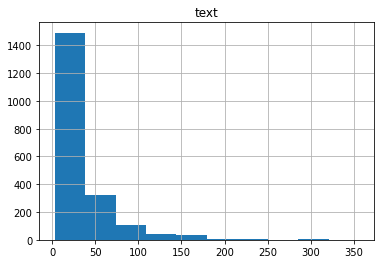

In [94]:
import matplotlib.pyplot as plt

real_count = []

for sent in fake_df['text']:
    real_count.append(len(sent.split()))

length_df = pd.DataFrame({'text':real_count})

length_df.hist(bins = 10)
plt.show()

In [95]:
#Check how much % of title have 0-20 words
cnt=0
for i in fake_df['text']:
    if(len(i.split())<=33 ):
        cnt=cnt+1


print(cnt/len(fake_df['text']))

0.7019374068554396


In [96]:
longest_text= 0
for sent in fake_df['text']:
    if len(sent.split()) > longest_text:
        longest_text = len(sent.split())

print(longest_text)

356


In [97]:
fake_df.drop(columns=['description_length'],axis=1,inplace=True)

# Combine Data

In [98]:
fake_df.shape,real_df.shape

((2013, 3), (6000, 3))

In [99]:
final_data = pd.concat([fake_df, real_df], axis=0)
final_data = shuffle(final_data) ## shuffle all the datapoints

final_data

,text,label,source
529561,"هجوم مطار أورلي : المهاجم اتصل بأبيه قائلا ""سا...",real,bbc.com
264,صفع الشيخة شيخة الصباح من حارسة عقار لاختراقها...,fake,fatabyyano
39563,محاولات جديدة لوقف تسرب النفط,real,aljazeera.net
79054,ضغط يهودي لتخفيف موقف أوباما,real,aljazeera.net
283927,العاهل السعودي ينشئ مجمعا للحديث النبوي الشريف...,real,arabic.rt.com
...,...,...,...
403,عاجل مباشرة من وكالة ناسا … رصد وتصوير كوكب ضخ...,fake,fatabyyano
1858,🔴#عاجل\nالفريق الصيني نيكتا بار يوجه تهديد الى...,fake,misbar
52625,خطف أميركية في جنوب أفغانستان,real,aljazeera.net
308661,"المكسيك تعتزم تسليم ""إل تشابو"" للولايات المتحدة",real,arabic.rt.com


In [100]:
print(len(final_data))

8013


In [101]:
final_data["label"].value_counts()

real    6000
fake    2013
Name: label, dtype: int64

In [102]:
### convert real 1 and fake 0
final_data['label']=final_data['label'].apply(lambda x: 1 if x=='real' else 0 )
final_data

,text,label,source
529561,"هجوم مطار أورلي : المهاجم اتصل بأبيه قائلا ""سا...",1,bbc.com
264,صفع الشيخة شيخة الصباح من حارسة عقار لاختراقها...,0,fatabyyano
39563,محاولات جديدة لوقف تسرب النفط,1,aljazeera.net
79054,ضغط يهودي لتخفيف موقف أوباما,1,aljazeera.net
283927,العاهل السعودي ينشئ مجمعا للحديث النبوي الشريف...,1,arabic.rt.com
...,...,...,...
403,عاجل مباشرة من وكالة ناسا … رصد وتصوير كوكب ضخ...,0,fatabyyano
1858,🔴#عاجل\nالفريق الصيني نيكتا بار يوجه تهديد الى...,0,misbar
52625,خطف أميركية في جنوب أفغانستان,1,aljazeera.net
308661,"المكسيك تعتزم تسليم ""إل تشابو"" للولايات المتحدة",1,arabic.rt.com


In [103]:
# Write final_data to new file
final_data.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataTitle/final_news.csv', index=False)
print("Done :) ")


Done :) 


In [104]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(final_data["text"], final_data['label'], test_size=0.2, random_state=1)

train_df = pd.DataFrame({'text':x_train ,'label':y_train})

x_train, x_val, y_train, y_val = train_test_split(train_df["text"], train_df["label"], test_size=0.2, random_state=1)

train_df = pd.DataFrame({'text':x_train ,'label':y_train})
train_df.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataTitle/train_news.csv', index=False)


val_df=pd.DataFrame({'text':x_val ,'label':y_val})
val_df.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataTitle/val_news.csv', index=False)

test_df = pd.DataFrame({'text':x_test ,'label':y_test})
test_df.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataTitle/test_news.csv', index=False)


In [105]:
train_df.label.value_counts().sort_values()

0    1257
1    3871
Name: label, dtype: int64

In [106]:
val_df.label.value_counts().sort_values()

0    328
1    954
Name: label, dtype: int64

In [107]:
test_df.label.value_counts().sort_values()

0     428
1    1175
Name: label, dtype: int64

# arabert preprocess V02

In [108]:
!pip install -q transformers
!pip -q install farasapy
!git clone https://github.com/aub-mind/arabert
!pip -q install pyarabic

fatal: destination path 'arabert' already exists and is not an empty directory.


In [109]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from arabert.preprocess import ArabertPreprocessor

In [110]:
#Call Model
model_name="bert-base-arabertv02"
processor = ArabertPreprocessor(model_name=model_name)

In [111]:
train_df.text = train_df.text.apply(lambda x:   processor.preprocess(x))
train_df.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataTitle/PPV2train_news.csv', index=False)

val_df.text = val_df.text.apply(lambda x:   processor.preprocess(x))
val_df.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataTitle/PPV2val_news.csv', index=False)

test_df.text = test_df.text.apply(lambda x:   processor.preprocess(x))
test_df.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataTitle/PPV2test_news.csv', index=False)


In [112]:
train_df.label.value_counts().sort_values()

0    1257
1    3871
Name: label, dtype: int64

In [113]:
val_df.label.value_counts().sort_values()

0    328
1    954
Name: label, dtype: int64

In [114]:
test_df.label.value_counts().sort_values()

0     428
1    1175
Name: label, dtype: int64